# Exploring Stackoverflow Anual Survey 2019

This is the first project for Udacity's Data Scientist Nanodegree. The data used in this project was obtained from [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)  The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, an industry standard for data analysis. It includes 6 steps: 

1. Business Understanding.
2. Data Understanding.
3. Prepare Data.
4. Data Modeling.
5. Evaluate the Results
6. Deploy.

In this project, we will follow the above steps to explore the data. 

## 1. Business Understanding
Being a woman in technology myself, I am mostly interested in what female scientists feels working/studyin in this field. Therefore I would like to find answers to the following questions:

1. What are the distributions of women with respect to country, ethnicity, level of education, etc?
2. What are the most popular types of development/languages among women?
3. What does the data suggest of man and woman in terms of salary and working hours? 
4. What factors associate with high salary, eg. type of development, education level, etc.?
5. Women with what skills earn more?

With these questions in mind, let's get into the data.

## 2. Data Understanding
First of all, let's import some useful libriaries and load the data.

In [1]:
# Import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import process as p
%matplotlib inline

# load the data and take a look at the first several rows to get a big picture
sof = pd.read_csv("data/survey_results_public.csv")
schema = pd.read_csv('data/survey_results_schema.csv')
sof.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
# Total rows and columns
sof.shape

(88883, 85)

In [3]:
# Schema data : descriptions for each column
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


The dataset has 88883 rows and 85 columns, let's take a look at missing values in general:

In [4]:
p.missing_ratio(sof).head()

,Count,Ratio
BlockchainOrg,40708,45.799534
CodeRevHrs,39093,43.982539
ConvertedComp,33060,37.194964
CompTotal,32938,37.057705
MiscTechWorkedWith,29297,32.961309


The column that has the most missing values is BlockchanOrg, lets get the description of it to see what the question is:

In [5]:
# Get the question description for column 'BlockchainOrg'
p.get_description('BlockchainOrg',schema)

'How is your organization thinking about or implementing blockchain technology?'

It turns out that this is an open question. I personally don't like open questions in the survey and I think most people feels the same way becasue it takes time to think and organize words. And this might be one of the reasons that people leave this question blank. 

In [6]:
# Get the question description for column 'CodeRevHrs' and 'ConvertedComp'
p.get_description('CodeRevHrs',schema),p.get_description('ConvertedComp',schema)

('On average, how many hours per week do you spend on code review?',
 'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.')

'CodeRevHrs' and 'ConvertedComp' also have large amount of missing values, the reason could be that both questions invlove calculation, which takes time. In addition, many people may not want to disclose their salary. 



## 3. & 4. Prepare Data and Data Modeling
Now, let's get to prepare our data and answer the questions.
First, we will look at the big picture of the gender distribution

In [7]:
gender = sof['Gender'].value_counts()
gender

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

The above result shows that this is a multiple chioce quesion and one column content would have several answers, separated by semicolon. We need to split these strings by semicolon and count the total in each category. Here I used a function from parpare_data.py module for this purpose. 

In [8]:
gender_splitted = p.split_column_content(sof,'Gender')
gender_splitted.reset_index(drop=True).head()

0    Man
1    Man
2    Man
3    Man
4    Man
dtype: object

Nice! This looks good. Let's count values and plot:

                                                type     ratio
0                                                Man  0.910256
1                                              Woman  0.077992
2  Non-binary, genderqueer, or gender non-conforming  0.011753


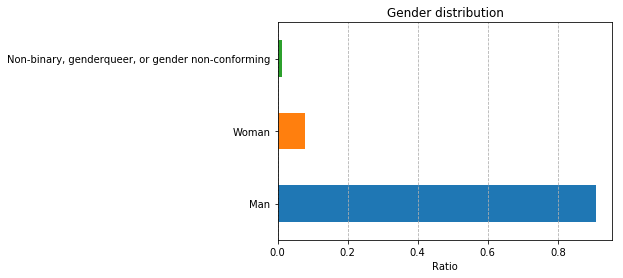

In [9]:
p.count_and_plot(gender_splitted, 'Gender distribution' )

We can see that male developers occupy 91% of the total population while female only 7.8%, which shold be a suprising finding since gender gap is a well known issue in IT industry. Rather than the gap, I am inerested in other aspects of female in tech field such as the questions I presiously listed. 

Now, let's try to answer these questions: 
### Q1. What are the distributions of women with respect to country, ethnicity, level of education, etc?

In [10]:
# Choose data related to women
women_df = sof[sof['Gender']=='Woman']
# Drop columns with all nan values
women_df = women_df.dropna(how='all', axis=1)

# Choose data related to men for future use
men_df = sof[sof['Gender']=='Man']
# Drop columns with all nan values
men_df = men_df.dropna(how='all', axis=1)

women_df.shape

(6344, 85)

                                                type     ratio
0                       White or of European descent  0.634672
1                                        South Asian  0.089455
2                                         East Asian  0.068397
3                          Hispanic or Latino/Latina  0.061214
4                        Black or of African descent  0.048808
5                                     Middle Eastern  0.041136
6                                        Multiracial  0.025139
7                                           Biracial  0.021058
8  Native American, Pacific Islander, or Indigeno...  0.010121


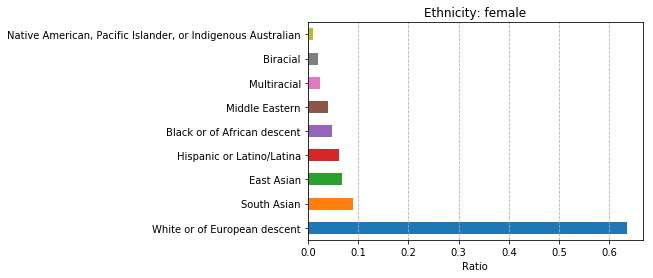

In [11]:
# Plot the top 10 ethniciy in female
p.count_and_plot(p.split_column_content(women_df,'Ethnicity'),'Ethnicity: female')

                                                type     ratio
0                       White or of European descent  0.657945
1                                        South Asian  0.111909
2                          Hispanic or Latino/Latina  0.066281
3                                         East Asian  0.051928
4                                     Middle Eastern  0.043447
5                        Black or of African descent  0.031435
6                                        Multiracial  0.020105
7                                           Biracial  0.010648
8  Native American, Pacific Islander, or Indigeno...  0.006300


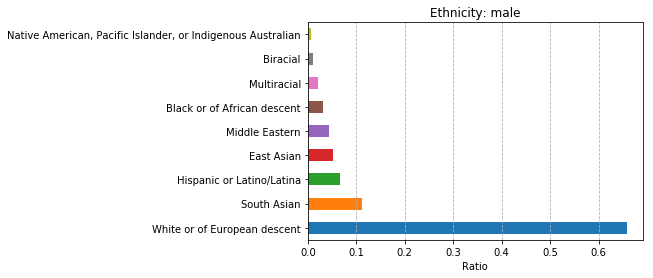

In [12]:
# Plot the top 10 ethniciy in male
p.count_and_plot(p.split_column_content(men_df,'Ethnicity'),'Ethnicity: male')

The ethnicity distributions are about the same between women and men: the percentage of White or European desent are both overwhelmingly higer than any other races for both genders, followed by South Asian. Then, it shows that there are more women of East Asian origin than men in tech field.

             type     ratio
0   United States  0.329760
1           India  0.089849
2  United Kingdom  0.067150
3          Canada  0.049023
4         Germany  0.046658
5          France  0.017970
6       Australia  0.017497
7          Poland  0.017024
8     Netherlands  0.017024
9         Romania  0.015132


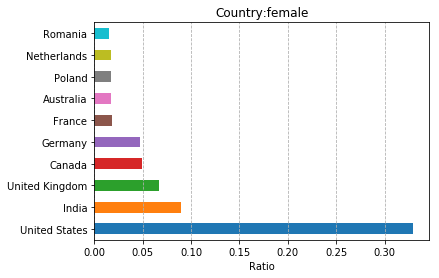

In [13]:
# Plot the top 10 country of residency in female
p.count_and_plot(p.split_column_content(women_df,'Country'),'Country:female')

             type     ratio
0   United States  0.227159
1           India  0.100130
2         Germany  0.067878
3  United Kingdom  0.064939
4          Canada  0.037423
5          France  0.027978
6          Brazil  0.023255
7          Poland  0.022549
8       Australia  0.021612
9     Netherlands  0.021510


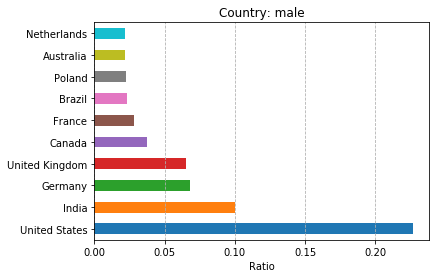

In [14]:
# Plot the top 10 country of residency in male
p.count_and_plot(p.split_column_content(men_df,'Country'),'Country: male')

In this session, we explored country that people currently reside and compared the result of female and male. A 

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.501617
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.240220
2  Some college/university study without earning ...  0.094083
3  Secondary school (e.g. American high school, G...  0.073553
4                                   Associate degree  0.031684
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.030068
6                 Professional degree (JD, MD, etc.)  0.012609
7                          Primary/elementary school  0.008083
8             I never completed any formal education  0.008083


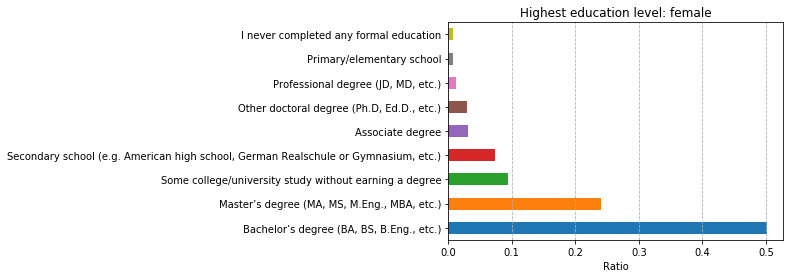

In [15]:
# Plot the top 10 highest education level in female
p.count_and_plot(p.split_column_content(women_df,'EdLevel'),'Highest education level: female')

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.450009
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.226783
2  Some college/university study without earning ...  0.123756
3  Secondary school (e.g. American high school, G...  0.101596
4                                   Associate degree  0.034067
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.027582
6                          Primary/elementary school  0.016738
7                 Professional degree (JD, MD, etc.)  0.013968
8             I never completed any formal education  0.005501


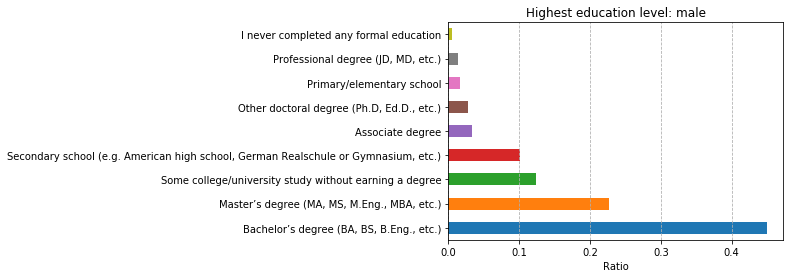

In [16]:
# Plot the top 10 highest education level in male
p.count_and_plot(p.split_column_content(men_df,'EdLevel'),'Highest education level: male')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.526707
1  Information systems, information technology, o...  0.064096
2  A natural science (ex. biology, chemistry, phy...  0.056672
3  A humanities discipline (ex. literature, histo...  0.055405
4  Another engineering discipline (ex. civil, ele...  0.053775
5  A social science (ex. anthropology, psychology...  0.053051
6                          Mathematics or statistics  0.051602
7                      Web development or web design  0.048162
8  Fine arts or performing arts (ex. graphic desi...  0.036212
9  A business discipline (ex. accounting, finance...  0.035307


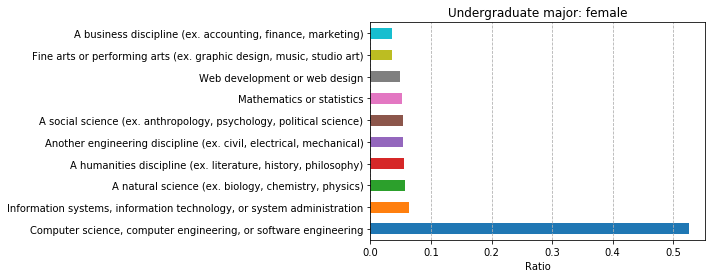

In [17]:
# Plot the top 10 undergraduate major in female
p.count_and_plot(p.split_column_content(women_df,'UndergradMajor'),'Undergraduate major: female')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.633520
1  Another engineering discipline (ex. civil, ele...  0.085542
2  Information systems, information technology, o...  0.070324
3                      Web development or web design  0.044377
4  A natural science (ex. biology, chemistry, phy...  0.041195
5                          Mathematics or statistics  0.037954
6  A business discipline (ex. accounting, finance...  0.023937
7  A humanities discipline (ex. literature, histo...  0.017559
8  A social science (ex. anthropology, psychology...  0.014872
9  Fine arts or performing arts (ex. graphic desi...  0.014122


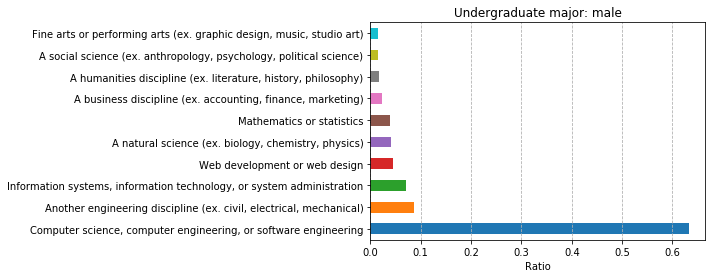

In [18]:
# Plot the top 10 undergraduate major in male
p.count_and_plot(p.split_column_content(men_df,'UndergradMajor'),'Undergraduate major: male')

                                                type     ratio
0  Taught yourself a new language, framework, or ...  0.253143
1  Taken an online course in programming or softw...  0.208135
2  Received on-the-job training in software devel...  0.142948
3                        Participated in a hackathon  0.087322
4                Contributed to open source software  0.078024
5  Taken a part-time in-person course in programm...  0.066455
6  Participated in online coding competitions (e....  0.065927
7  Participated in a full-time developer training...  0.063867
8  Completed an industry certification program (e...  0.034179


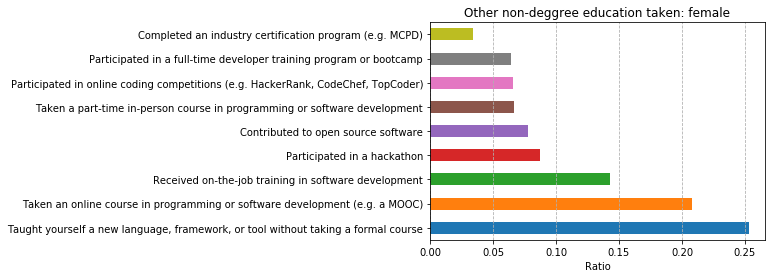

In [19]:
# Plot the top 10 non-degree education taken in female
p.count_and_plot(p.split_column_content(women_df,'EduOther'),'Other non-deggree education taken: female')

                                                type     ratio
0  Taught yourself a new language, framework, or ...  0.262949
1  Taken an online course in programming or softw...  0.182441
2                Contributed to open source software  0.128871
3  Received on-the-job training in software devel...  0.118863
4                        Participated in a hackathon  0.079162
5  Participated in online coding competitions (e....  0.078940
6  Taken a part-time in-person course in programm...  0.056476
7  Completed an industry certification program (e...  0.046898
8  Participated in a full-time developer training...  0.045399


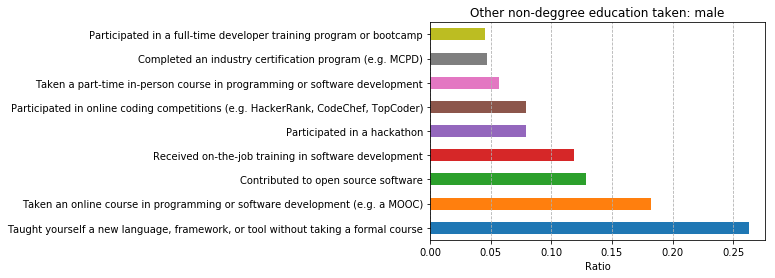

In [20]:
# Plot the top 10 non-degree education taken in male
p.count_and_plot(p.split_column_content(men_df,'EduOther'),'Other non-deggree education taken: male')

### Q2(old). What are the challenges that women are facing in tech field? 

In [21]:
p.get_description('WorkChallenge',schema)

'Of these options, what are your greatest challenges to productivity as a developer? Select up to 3:'

                                                type     ratio
0                       Distracting work environment  0.161705
1                                           Meetings  0.140308
2             Being tasked with non-development work  0.131935
3                 Not enough people for the workload  0.126522
4                    Lack of support from management  0.104110
5                             Toxic work environment  0.090663
6  Non-work commitments (parenting, school work, ...  0.083474
7                               Time spent commuting  0.080768
8               Inadequate access to necessary tools  0.080514


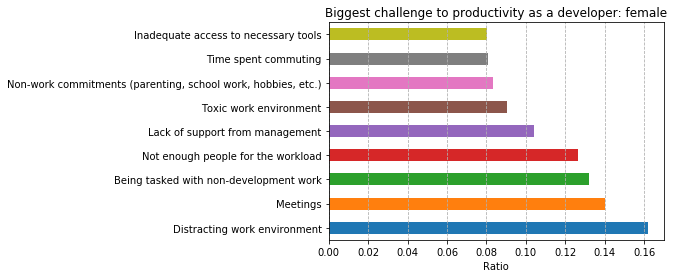

In [22]:
# Plot the greatest challenges in work in female
p.count_and_plot(p.split_column_content(women_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: female')

                                                type     ratio
0                       Distracting work environment  0.162504
1             Being tasked with non-development work  0.143066
2                                           Meetings  0.142557
3                 Not enough people for the workload  0.130735
4                    Lack of support from management  0.102924
5               Inadequate access to necessary tools  0.082028
6                             Toxic work environment  0.079636
7                               Time spent commuting  0.079528
8  Non-work commitments (parenting, school work, ...  0.077021


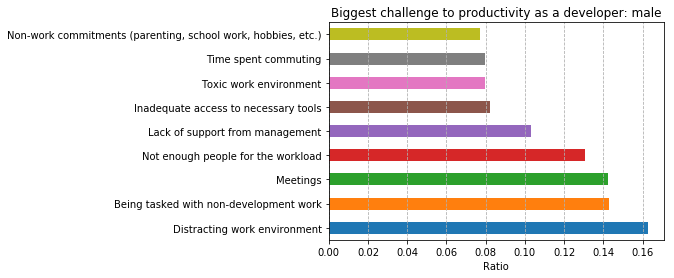

In [23]:
# Plot the greatest challenges in work in male
p.count_and_plot(p.split_column_content(men_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: male')

                                 type     ratio
0                      Very satisfied  0.365512
1                  Slightly satisfied  0.319101
2               Slightly dissatisfied  0.145627
3  Neither satisfied nor dissatisfied  0.101691
4                   Very dissatisfied  0.068069


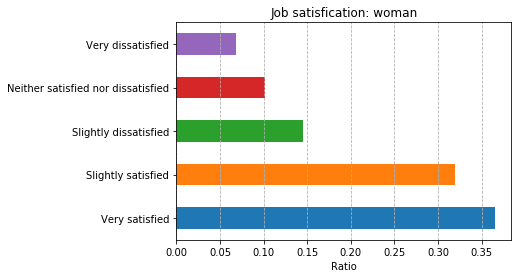

In [52]:
p.count_and_plot(p.split_column_content(women_df,'JobSat'),'Job satisfication: woman')

                                 type     ratio
0                  Slightly satisfied  0.344183
1                      Very satisfied  0.313171
2               Slightly dissatisfied  0.152259
3  Neither satisfied nor dissatisfied  0.122926
4                   Very dissatisfied  0.067461


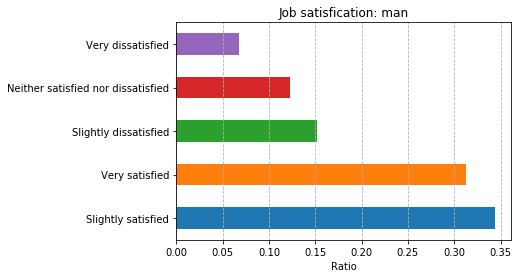

In [53]:
p.count_and_plot(p.split_column_content(men_df,'JobSat'),'Job satisfication: man')

                                 type     ratio
0                      Very satisfied  0.417334
1                  Slightly satisfied  0.337670
2               Slightly dissatisfied  0.108086
3  Neither satisfied nor dissatisfied  0.091873
4                   Very dissatisfied  0.045036


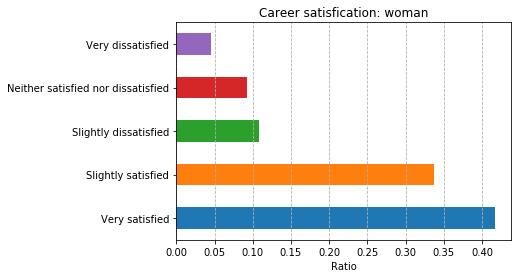

In [54]:
p.count_and_plot(p.split_column_content(women_df,'CareerSat'),'Career satisfication: woman')

                                 type     ratio
0                      Very satisfied  0.401990
1                  Slightly satisfied  0.345023
2               Slightly dissatisfied  0.104728
3  Neither satisfied nor dissatisfied  0.097476
4                   Very dissatisfied  0.050783


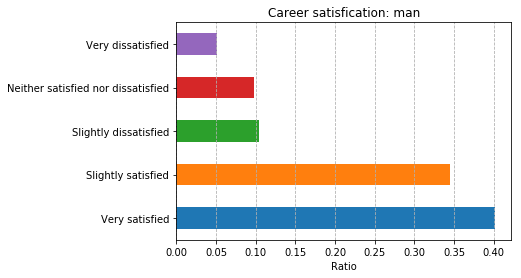

In [55]:
p.count_and_plot(p.split_column_content(men_df,'CareerSat'),'Career satisfication: man')

### Q2. What is the most popular type of development among women?

                                            type     ratio
0                          Developer, full-stack  0.162774
1                            Developer, back-end  0.148945
2                           Developer, front-end  0.136951
3                                        Student  0.065477
4                              Developer, mobile  0.058139
5  Developer, desktop or enterprise applications  0.053059
6                                       Designer  0.044098
7  Data scientist or machine learning specialist  0.034291
8                       Data or business analyst  0.031962
9                            Academic researcher  0.030198


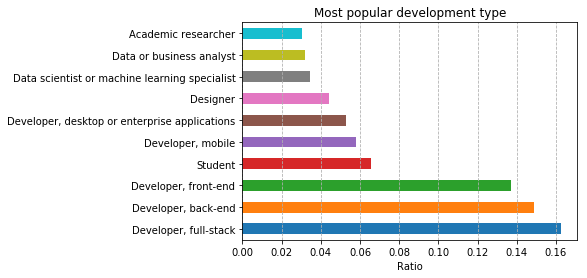

In [24]:
p.count_and_plot(p.split_column_content(women_df,'DevType'),'Most popular development type')

                    type     ratio
0               HTML/CSS  0.146838
1             JavaScript  0.145486
2                    SQL  0.112958
3                   Java  0.083135
4                 Python  0.082352
5  Bash/Shell/PowerShell  0.063490
6                     C#  0.053205
7                    PHP  0.050714
8                    C++  0.040998
9             TypeScript  0.037154


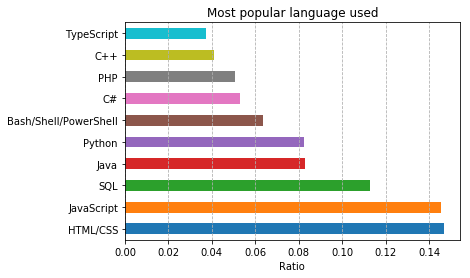

In [25]:
p.count_and_plot(p.split_column_content(women_df,'LanguageWorkedWith'),'Most popular language used')

                                            type     ratio
0                          Developer, full-stack  0.162774
1                            Developer, back-end  0.148945
2                           Developer, front-end  0.136951
3                                        Student  0.065477
4                              Developer, mobile  0.058139
5  Developer, desktop or enterprise applications  0.053059
6                                       Designer  0.044098
7  Data scientist or machine learning specialist  0.034291
8                       Data or business analyst  0.031962
9                            Academic researcher  0.030198


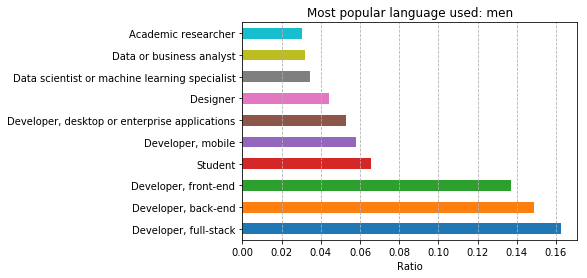

In [26]:
p.count_and_plot(p.split_column_content(women_df,'DevType'),'Most popular language used: men')

                    type     ratio
0             JavaScript  0.134212
1               HTML/CSS  0.124849
2                    SQL  0.108183
3                 Python  0.082648
4                   Java  0.081458
5  Bash/Shell/PowerShell  0.073380
6                     C#  0.062526
7                    PHP  0.052436
8                    C++  0.046583
9             TypeScript  0.042813


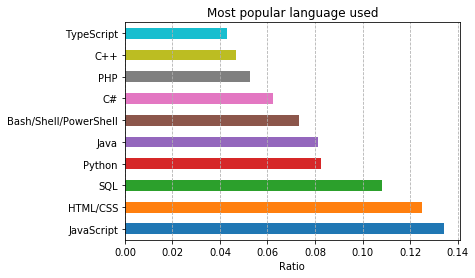

In [27]:
p.count_and_plot(p.split_column_content(men_df,'LanguageWorkedWith'),'Most popular language used')

### Q3. What does the data suggest of men and women in terms of salary and working hours? 
First, let's pull out all the numerical variables from women_df and see the overall statistics

In [29]:
women_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,6344.000000,3.768000e+03,3.762000e+03,4390.000000,3149.000000,5636.000000
mean,44507.677333,2.307483e+11,1.148642e+05,41.813683,4.770276,29.495724
std,25776.051327,1.416424e+13,2.571464e+05,75.488601,5.239644,8.350789
min,12.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22031.000000,2.200000e+04,2.668725e+04,39.000000,2.000000,24.000000
50%,44851.500000,6.100000e+04,5.753200e+04,40.000000,4.000000,28.000000
75%,66698.500000,1.054878e+05,9.899100e+04,40.000000,5.000000,33.000000
max,88864.000000,8.694580e+14,2.000000e+06,4850.000000,90.000000,99.000000


In [30]:
men_df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,77919.000000,5.061100e+04,5.050300e+04,58057.000000,44976.000000,71566.000000
mean,44437.350659,1.975873e+11,1.274582e+05,42.143995,5.063939,30.424480
std,25644.559035,4.445059e+13,2.848084e+05,33.022336,5.345024,9.162677
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22236.500000,2.000000e+04,2.566800e+04,40.000000,2.000000,24.000000
50%,44430.000000,6.200000e+04,5.725400e+04,40.000000,4.000000,29.000000
75%,66645.000000,1.200000e+05,1.000000e+05,45.000000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4125.000000,99.000000,99.000000


The average annual salary that female earn is \$114,864.2, which is slightly less than female of \$127,458.2. 
The average working hours per week for female is \$41.8, and \$42.1 for male. 
If we calclulate the salary per hour, we can get \$55 per hour for female and \$60.6 per hour for male. 


### Q4. What factors associate with high salary, eg. type of development, education level, etc.?
The first factor that I came up with is type of development since difference tech specalizations may affect salary. So I will group the data by development types, then calculate the median salary for each type and then sort the salary in descending order. 

First, we will drop NaN values in the columns

In [31]:
# slice the columns we want to check, drop the missing values 
dev_salary = women_df.loc[:,['DevType','ConvertedComp']].dropna()
dev_salary.head()

,DevType,ConvertedComp
34,"Developer, front-end",80000.0
70,"Developer, full-stack",4128.0
74,"Developer, front-end",17491.0
85,"Developer, back-end;Developer, front-end;Educator",16008.0
99,"Developer, back-end;Developer, front-end;Devel...",229016.0


Then, we want to take a look at the distribution of the salaries to decide if we should use mean or median to calculate salary after grouping 'DevType'

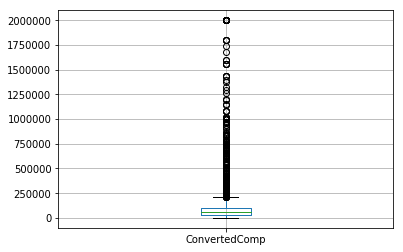

In [32]:
box_plot = women_df.boxplot(column=['ConvertedComp'])

The boxplot shows that the salary is skewed by outliers with very high salary. Therefore, mean is not an option.We will use median to represent each group's earning.

Next, we will split the strings in 'DevType' separated by delimiter ';', store each of them inplace in the same column, associate each with corresponding salary:

In [33]:
# Split strings in 'DevType' and concat with 'ConvertedComp' column
dev_salary_split = p.split_and_concat(dev_salary,'DevType','ConvertedComp')

Lastly, group by 'DevType' and calculate median salary for each group using agg( ) function

In [34]:
# Group by 'DevType' and calculate median salary for each group
dev_salary_group= p.group_and_agg(dev_salary_split,'DevType').reset_index(drop=True)
dev_salary_group


,DevType,ConvertedComp
0,Engineering manager,101271.0
1,"Engineer, site reliability",99465.5
2,Senior executive/VP,90000.0
3,DevOps specialist,73456.5
4,Data scientist or machine learning specialist,65424.0
5,Product manager,65424.0
6,"Engineer, data",63480.0
7,"Developer, full-stack",60000.0
8,Data or business analyst,60000.0
9,"Developer, embedded applications or devices",57564.0


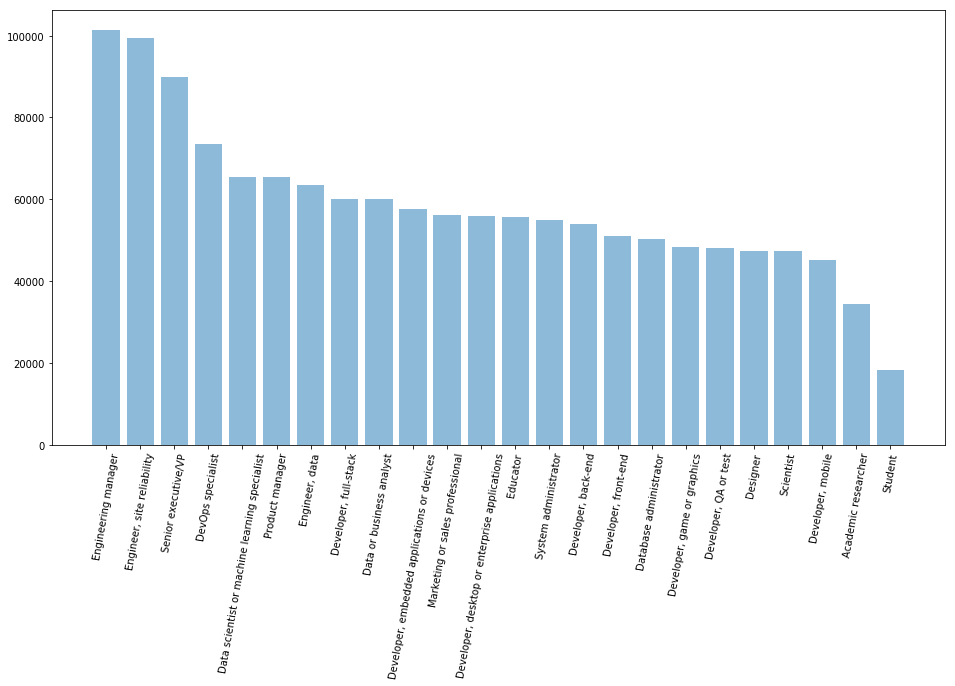

In [35]:
plt.figure(figsize=(16,8))
y_pos = np.arange(dev_salary_group.shape[0])
plt.bar(y_pos, dev_salary_group['ConvertedComp'],alpha=0.5)
plt.xticks(y_pos,dev_salary_group['DevType'],rotation=80)
plt.show()

Similarily, following the above steps, let's take a look at the median salary in terms of the size of organization, level of highest education, and languages used:

In [36]:
orgsize_salary = women_df.loc[:,['OrgSize','ConvertedComp']].dropna()
orgsize_salary_group = p.group_and_agg(p.split_and_concat(orgsize_salary,'OrgSize','ConvertedComp'),'OrgSize').reset_index(drop=True)
orgsize_salary_group

,OrgSize,ConvertedComp
0,"10,000 or more employees",80000.0
1,"1,000 to 4,999 employees",71600.0
2,"5,000 to 9,999 employees",66000.0
3,100 to 499 employees,63240.0
4,500 to 999 employees,61071.0
5,20 to 99 employees,49494.0
6,"Just me - I am a freelancer, sole proprietor, ...",40080.0
7,2-9 employees,39768.0
8,10 to 19 employees,38496.0


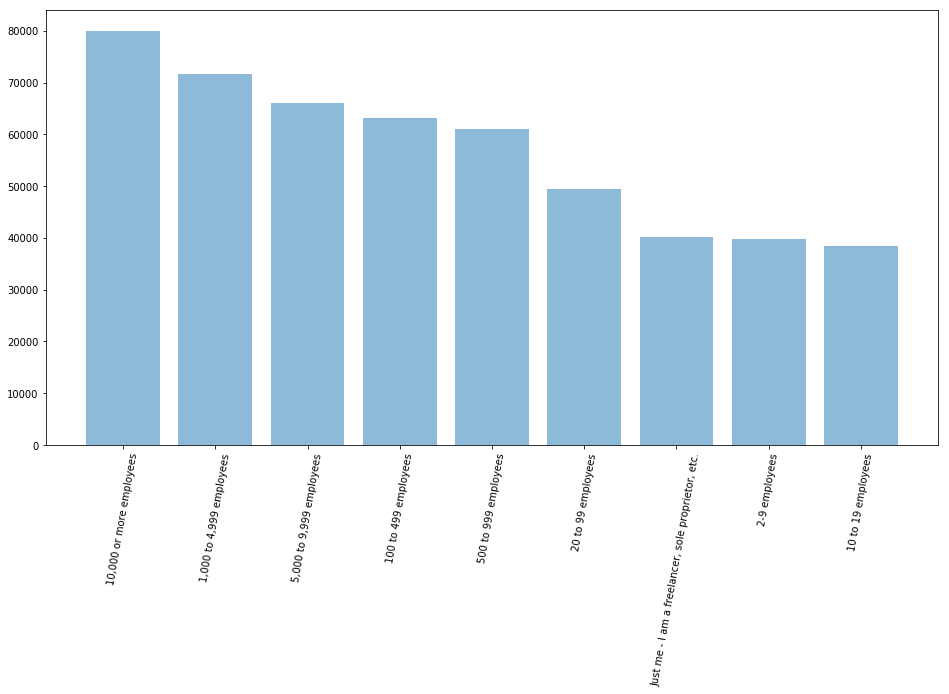

In [37]:
plt.figure(figsize=(16,8))
y_pos = np.arange(orgsize_salary_group.shape[0])
plt.bar(y_pos, orgsize_salary_group['ConvertedComp'],alpha=0.5)
plt.xticks(y_pos,orgsize_salary_group['OrgSize'],rotation=80)
plt.show()

In [38]:
ed_salary = women_df.loc[:,['EdLevel','ConvertedComp']].dropna()
ed_salary_group = p.group_and_agg(p.split_and_concat(ed_salary,'EdLevel','ConvertedComp'),'EdLevel').reset_index(drop=True)
ed_salary_group

,EdLevel,ConvertedComp
0,"Other doctoral degree (Ph.D, Ed.D., etc.)",75624.0
1,I never completed any formal education,65651.0
2,"Bachelor’s degree (BA, BS, B.Eng., etc.)",63948.0
3,Primary/elementary school,59376.0
4,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",55178.0
5,Associate degree,53437.0
6,Some college/university study without earning ...,50771.0
7,"Secondary school (e.g. American high school, G...",27492.0
8,"Professional degree (JD, MD, etc.)",23280.0


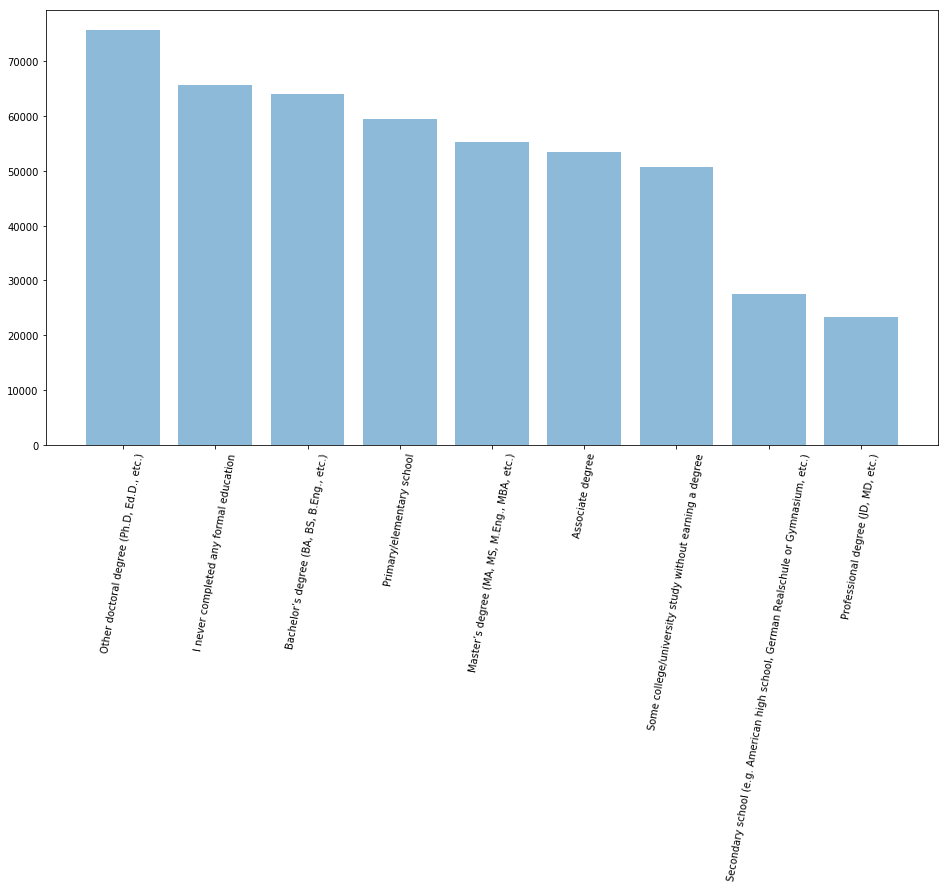

In [39]:
plt.figure(figsize=(16,8))
y_pos = np.arange(ed_salary_group.shape[0])
plt.bar(y_pos, ed_salary_group['ConvertedComp'],alpha=0.5)
plt.xticks(y_pos,ed_salary_group['EdLevel'],rotation=80)
plt.show()

An ineresting finding from the above dataframe is that women who have never completed any formal education earn the second most following women with doctoral degrees, which is contrary to intuition that people with higher degree earn more. What happened? Is it true that pepole who have never attended any formal education earn more than those who do?

Let's explore further.

Let's select all the rows that women who have never completed any formal education

In [40]:
# Select rows that women have no formal education and drop all missing values
no_ed = women_df[women_df['EdLevel'] == 'I never completed any formal education']
no_ed = no_ed.loc[:,['EduOther', 'ConvertedComp']].dropna()
no_ed

,EduOther,ConvertedComp
17006,Taken an online course in programming or softw...,687444.0
18230,Received on-the-job training in software devel...,26000.0
25315,Taken an online course in programming or softw...,175000.0
30591,Taken an online course in programming or softw...,150.0
52108,"Taught yourself a new language, framework, or ...",923592.0
53049,Taken an online course in programming or softw...,65651.0
57041,Taken an online course in programming or softw...,23436.0
70548,Taken an online course in programming or softw...,90000.0
73157,Taken an online course in programming or softw...,58447.0


In [41]:
# split and concat with salary column
p.group_and_agg(p.split_and_concat(no_ed,'EduOther','ConvertedComp'),'EduOther').reset_index(drop=True)

,EduOther,ConvertedComp
0,Participated in a hackathon,99218.0
1,Taken an online course in programming or softw...,65651.0
2,"Taught yourself a new language, framework, or ...",65651.0
3,Completed an industry certification program (e...,56718.0
4,Contributed to open source software,26000.0
5,Received on-the-job training in software devel...,26000.0
6,Taken a part-time in-person course in programm...,23436.0
7,Participated in a full-time developer training...,11793.0
8,Participated in online coding competitions (e....,11793.0


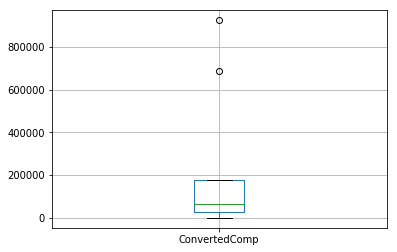

In [42]:
box_plot = no_ed.boxplot(column=['ConvertedComp'])

After dropping all nan values, we found that the sample size is rather small, only 9 paticipants with 2 ourliers. If this is the case, the median salary under this category is not compelling enough to convince us. 

So I wonder, is it something about missing values? I created a function to check on percentage of missing salaries in each of the group of education level:

In [43]:
def check_missing(df,col,desc):
    '''
    INPUT:
        - df : a dataframe to choose columns from
        - col - string : a column for splitting
        - desc - string : description of level of education, such as 'Other doctoral degree (Ph.D, Ed.D., etc.)'
    OUTPUT:
        - ratio - number : the percentage of missing values
    '''
    new_df = df[df['EdLevel'] == desc]
    ratio = np.sum(new_df['ConvertedComp'].isnull())/new_df.shape[0]
    return ratio
    
# check missing salaries for women with doctor's degree
check_missing(women_df,'EdLevel','Other doctoral degree (Ph.D, Ed.D., etc.)')

0.34946236559139787

In [44]:
# check missing salaries for women with doctor's degree
check_missing(women_df,'EdLevel','I never completed any formal education')

0.82

82% of women who have no formal education did not answer the salary question. Too many missing!

In [45]:
# check missing salaries for women with doctor's degree
check_missing(women_df,'EdLevel','Bachelor’s degree (BA, BS, B.Eng., etc.)')

0.35546245568804385

35% of women who have doctoral' degree did not answer the salary question, not very good, but acceptable

In [46]:
# check missing salaries for women with doctor's degree
check_missing(women_df,'EdLevel','Primary/elementary school')

0.9

90% of women who graduated from elementary school refuses to answer the salary question. Way too many missing!

In [47]:
# check missing salaries for women with doctor's degree
check_missing(women_df,'EdLevel','Master’s degree (MA, MS, M.Eng., MBA, etc.)')

0.3283983849259758

The answer is getting clear: the reason that women with no formal education has higher ranking is that 82% of them refuse to answer this question. This is similar to those who only attended elementary, with a missing rate of 90%. 

In [48]:
edother_salary = women_df.loc[:,['EduOther','ConvertedComp']].dropna()
edother_salary_group = p.group_and_agg(p.split_and_concat(edother_salary,'EduOther','ConvertedComp'),'EduOther').reset_index(drop=True)
edother_salary_group

,EduOther,ConvertedComp
0,Contributed to open source software,74812.0
1,Participated in a hackathon,74237.0
2,Completed an industry certification program (e...,65000.0
3,Received on-the-job training in software devel...,64000.0
4,Participated in a full-time developer training...,62000.0
5,"Taught yourself a new language, framework, or ...",60000.0
6,Taken a part-time in-person course in programm...,57293.0
7,Taken an online course in programming or softw...,56490.0
8,Participated in online coding competitions (e....,56142.0


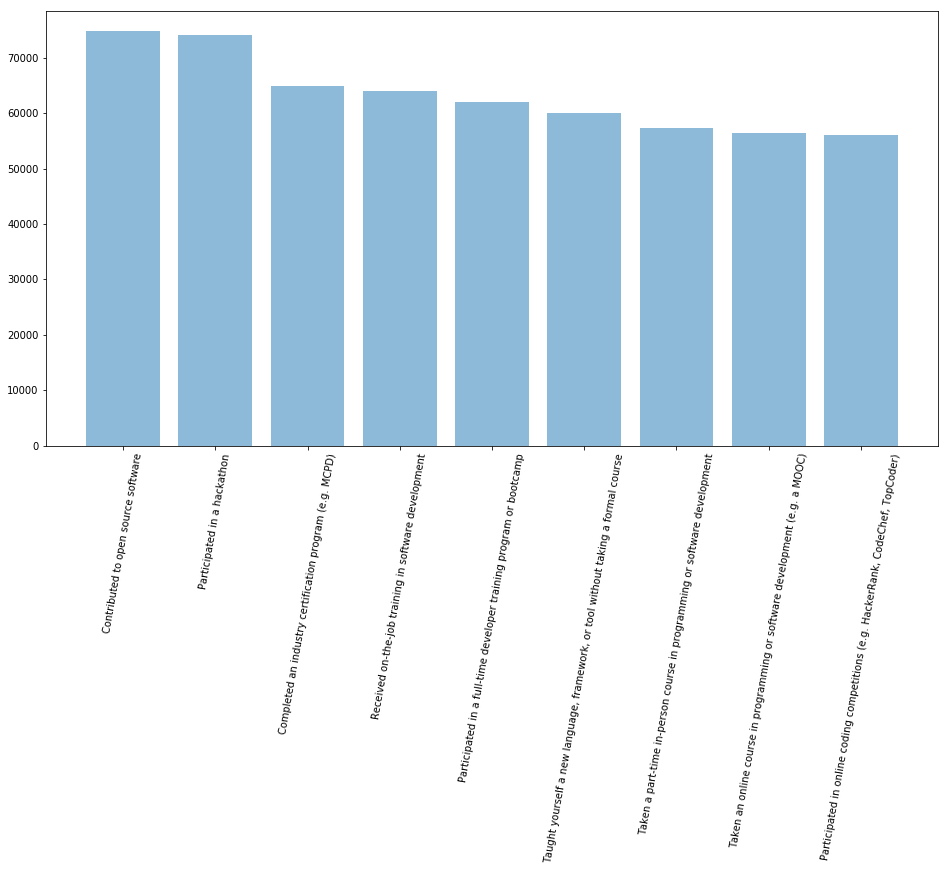

In [49]:
plt.figure(figsize=(16,8))
y_pos = np.arange(edother_salary_group.shape[0])
plt.bar(y_pos, edother_salary_group['ConvertedComp'],alpha=0.5)
plt.xticks(y_pos,edother_salary_group['EduOther'],rotation=80)
plt.show()

In [50]:
lang_salary = women_df.loc[:,['LanguageWorkedWith','ConvertedComp']].dropna()
lang_salary_group = p.group_and_agg(p.split_and_concat(lang_salary,'LanguageWorkedWith','ConvertedComp'),'LanguageWorkedWith').reset_index(drop=True)
lang_salary_group

,LanguageWorkedWith,ConvertedComp
0,Go,91087.0
1,Clojure,90450.0
2,Elixir,85000.0
3,Rust,75000.0
4,Ruby,74000.0
5,Scala,70700.0
6,Bash/Shell/PowerShell,70000.0
7,Kotlin,68725.0
8,Python,64888.0
9,Swift,62000.0


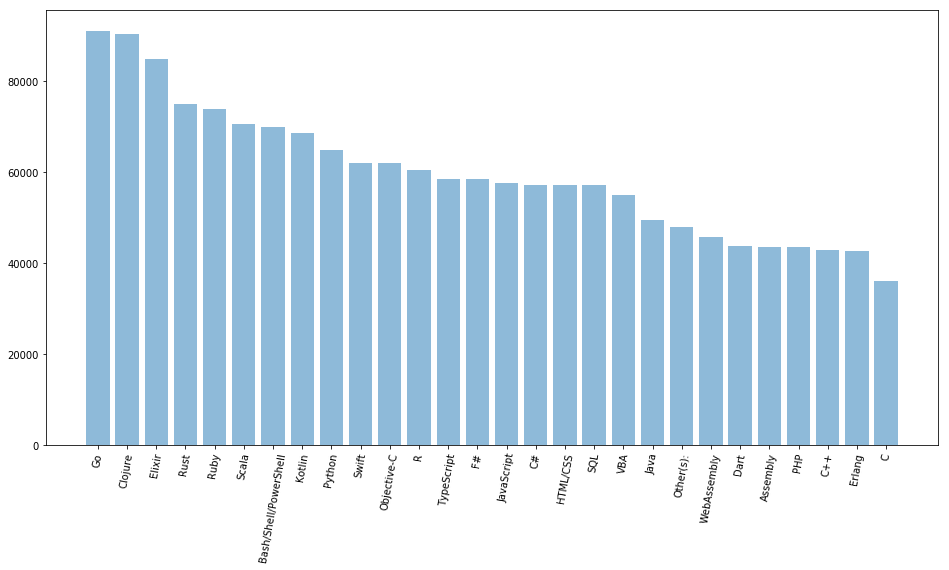

In [51]:
plt.figure(figsize=(16,8))
y_pos = np.arange(lang_salary_group.shape[0])
plt.bar(y_pos, lang_salary_group['ConvertedComp'],alpha=0.5)
plt.xticks(y_pos,lang_salary_group['LanguageWorkedWith'],rotation=80)
plt.show()


### Q5.(conclusion) Women with what skills earn more? 

To sum up:
1. Excluding manage/executive positions, women working as site reliability engineers, devOps specialist, data scientist or machine learning specialist, data engineer and full-stack developer receives earnings more than that as other types of developer; 
2. Women working in an large company with 10,000 or more employees, or in a midium sized company with 1000 to 4999 employees receives the highest salary.
3. Women who have doctoral and degree,bachelor's degree tend to earn more. Although women who had no formal education ranked the 2nd, becasue 82% of them refuses to fill in their salary, the ranking of this group is not reliable.  
4. In terms of other education, women with higher salary like to contribute to open source, participate in hackathons or complete industry certification programs
5. Among the programming languages used, women who worked with Go earn the most, followed by Glojure, Elixir, Rust and Ruby. 

# 5. 6. Results & Deploy

Please check my blog post on [Medium](https://medium.com/@guojian0706/this-tells-you-all-about-womens-career-in-tech-in-2019-85bcf9ab71e5?sk=49b7aa0e11d37aa467047fc5bd86f48a) to see an summary of the result. 